## Observations
* The Maximum Temp tends to fall within 20 degrees latitude of the equator.
* Temperature showed to have the highest correlation with coordinates.
* Humidity correlation was small but prevalent.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
  
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
len(cities)




617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
city_data = []

#weather_df = pd.DataFrame(columns = city_data)

#Base url to make the api call
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

#Run the API call for each city
print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')

record_num = 1
record_set = 1

for i, city in enumerate(cities) : 
    #Create the query url for the API call
    query_url = f"{base_url}{city}&appid={weather_api_key}"
    
    #API call
    weather_json = requests.get(query_url).json()
    
    
    try: 
        #Meassage to alert the user that the data is being retrieved
        print(f'Processing Weather Data for Record {record_num} of Set {record_set} | {city}')
        
        
        lat = weather_json['coord']['lat']
        lng = weather_json['coord']['lon']
        m_temp = weather_json['main']['temp_max']
        hum = weather_json['main']['humidity']
        clouds = weather_json['clouds']['all']
        speed = weather_json['wind']['speed']
        country = weather_json['sys']['country']
        date = weather_json['dt']

        #Create a dataframe to store the data
        city_data.append({'City': city,
                    'Lat': lat, 
                    'Lng': lng,
                    'Max Temp' :m_temp,
                   'Humidity': hum,
                   'Cloudiness': clouds,
                   'Wind_Speed': speed,
                   'Country': country,
                   'Date': date})
        
        #Increase the record count
        record_num += 1
        
    except (KeyError, IndexError):
        print("City not found....Skipping............")
    
    #If statement to handle the API call limits
    if record_num == 51:
        record_set += 1
        record_num = 1
        time.sleep(60)
        
print('''
-----------------------------
Data Retrival Complete
-----------------------------''')



-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Weather Data for Record 1 of Set 1 | albany
Processing Weather Data for Record 2 of Set 1 | mataura
Processing Weather Data for Record 3 of Set 1 | tarudant
City not found....Skipping............
Processing Weather Data for Record 3 of Set 1 | chuy
Processing Weather Data for Record 4 of Set 1 | saryg-sep
Processing Weather Data for Record 5 of Set 1 | lodja
Processing Weather Data for Record 6 of Set 1 | cockburn town
Processing Weather Data for Record 7 of Set 1 | busselton
Processing Weather Data for Record 8 of Set 1 | airai
Processing Weather Data for Record 9 of Set 1 | sanford
Processing Weather Data for Record 10 of Set 1 | esperance
Processing Weather Data for Record 11 of Set 1 | hilo
Processing Weather Data for Record 12 of Set 1 | punta arenas
Processing Weather Data for Record 13 of Set 1 | kavieng
Processing Weather Data for Record 14 of Set 1 | cherskiy
Processing Weather Dat

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:


#Preview the dataframe
weather_df = pd.DataFrame(city_data)

weather_df.head()
    

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,albany,42.6001,-73.9662,48.00,77,100,3.00,US,1616806416
1,mataura,-46.1927,168.8643,64.99,70,100,5.99,NZ,1616806699
2,chuy,-33.6971,-53.4616,68.76,94,100,3.00,UY,1616806627
3,saryg-sep,51.5000,95.6000,16.68,85,14,2.24,RU,1616806699
4,lodja,-3.4833,23.4333,65.48,98,100,1.66,CD,1616806654


In [100]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind_Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,21.137831,21.466454,55.366507,72.093972,53.393617,7.778191,1.616807e+09
std,33.122336,88.924950,24.980655,21.649067,40.568093,5.401595,2.508029e+02
min,-54.800000,-175.200000,-32.930000,1.000000,0.000000,0.310000,1.616806e+09
25%,-6.228550,-58.671850,37.927500,63.000000,9.000000,3.620000,1.616807e+09
50%,26.112550,26.789300,63.390000,77.000000,62.500000,6.745000,1.616807e+09
75%,50.054700,102.334775,75.990000,88.000000,98.000000,10.360000,1.616807e+09
max,78.218600,178.416700,90.000000,100.000000,100.000000,27.630000,1.616808e+09


In [34]:
clean_city_data = weather_df.query('Humidity < 100')

clean_city_data.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind_Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,21.078329,21.656861,55.354501,71.435572,52.996370,7.815826,1.616807e+09
std,33.228363,89.340540,25.009535,21.469025,40.723859,5.426311,2.504802e+02
min,-54.800000,-175.200000,-32.930000,1.000000,0.000000,0.310000,1.616806e+09
25%,-6.341600,-59.126750,37.590000,62.500000,8.000000,3.635000,1.616807e+09
50%,26.124700,26.891000,63.300000,77.000000,62.000000,6.850000,1.616807e+09
75%,50.076000,104.408800,76.055000,87.000000,98.000000,10.360000,1.616807e+09
max,78.218600,178.416700,90.000000,99.000000,100.000000,27.630000,1.616808e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot


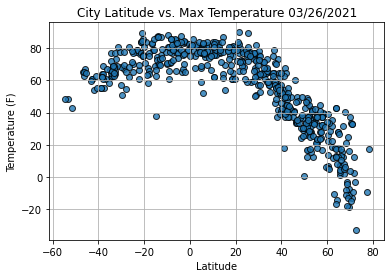

In [35]:
plt.scatter(clean_city_data["Lat"],
            clean_city_data["Max Temp"],
            edgecolor="black",linewidths=1,marker="o",
            alpha=0.8, label="Cities")

plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude vs Temperature (F).png")

plt.show()

## Latitude vs. Humidity Plot

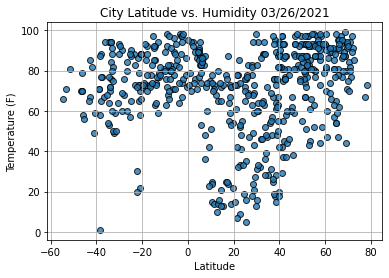

In [36]:
plt.scatter(clean_city_data["Lat"],
            clean_city_data["Humidity"],
            edgecolor="black",linewidths=1,marker="o",
            alpha=0.8, label="Cities")

plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude vs Humidity (F).png")

plt.show()

## Latitude vs. Cloudiness Plot

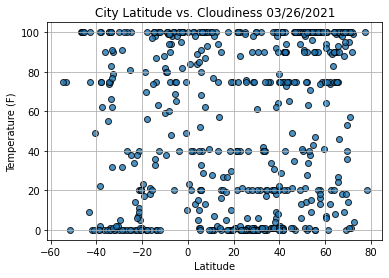

In [37]:
plt.scatter(clean_city_data["Lat"],
            clean_city_data["Cloudiness"],
            edgecolor="black",linewidths=1,marker="o",
            alpha=0.8, label="Cities")

plt.title(f'City Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude vs Cloudiness (F).png")

plt.show()

## Latitude vs. Wind Speed Plot

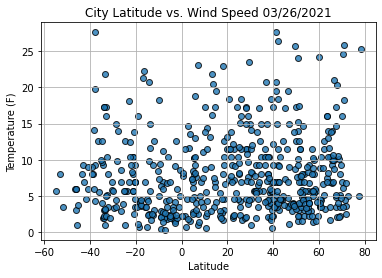

In [105]:
plt.scatter(clean_city_data["Lat"],
            clean_city_data["Wind_Speed"],
            edgecolor="black",linewidths=1,marker="o",
            alpha=0.8, label="Cities")

plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude vs Wind Speed (F).png")

plt.show()

## Linear Regression

In [39]:
northern_hem = clean_city_data.query('Lat > 0 and Lng > 0')

northern_hem.describe()



,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind_Speed,Date
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,2.290000e+02
mean,39.339737,77.893450,46.138734,72.960699,59.113537,7.191572,1.616807e+09
std,21.338535,45.564108,25.817496,23.851390,40.329947,5.438631,2.471209e+02
min,0.133300,0.987900,-18.600000,13.000000,0.000000,0.600000,1.616807e+09
25%,22.566700,38.983300,28.240000,65.000000,19.000000,3.440000,1.616807e+09
50%,41.610300,74.466700,44.010000,81.000000,75.000000,5.170000,1.616807e+09
75%,56.450000,117.631900,71.350000,91.000000,100.000000,9.240000,1.616807e+09
max,78.218600,178.416700,87.010000,98.000000,100.000000,25.840000,1.616808e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8161794137036197


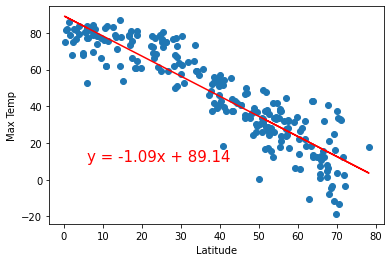

In [108]:
x_values = northern_hem['Lat']
y_values = northern_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("NH_Max Temp vs. Latitude Linear Regression.png")


plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [41]:
southern_hem = clean_city_data.query('Lat < 0 and Lng < 0')

southern_hem.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind_Speed,Date
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,5.900000e+01
mean,-22.864946,-71.102100,68.986271,78.593220,45.677966,8.360508,1.616807e+09
std,13.435978,34.018553,10.748489,12.316402,38.202925,6.094344,2.563197e+02
min,-54.800000,-175.200000,37.990000,20.000000,0.000000,0.740000,1.616807e+09
25%,-33.264150,-73.868500,61.405000,72.500000,0.000000,3.440000,1.616807e+09
50%,-21.207800,-65.180700,70.000000,81.000000,40.000000,6.910000,1.616807e+09
75%,-13.368350,-51.786850,77.305000,87.500000,75.000000,10.360000,1.616807e+09
max,-0.739300,-34.855300,84.200000,97.000000,100.000000,27.630000,1.616807e+09


The r-squared is: 0.4769039272995553


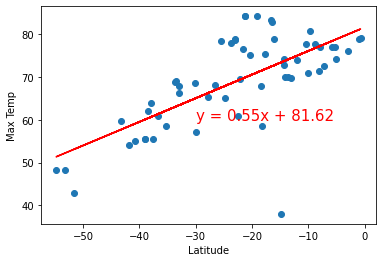

In [107]:
x_values = southern_hem['Lat']
y_values = southern_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")

plt.savefig(" SH-Max Temp vs. Latitude Linear Regression.png")



plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression


The r-squared is: 0.2015466842828954


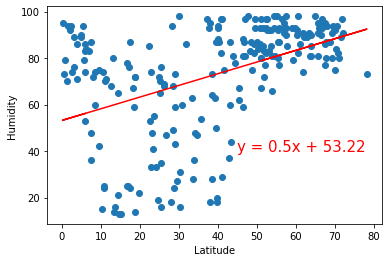

In [109]:
x_values = northern_hem['Lat']
y_values = northern_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

plt.savefig(" NH-Humidity vs. Latitude Linear Regression.png")


plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.047529877356182956


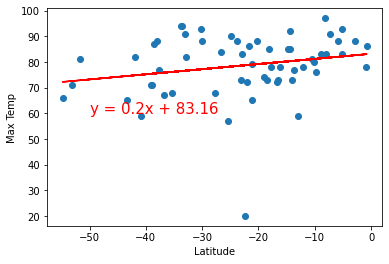

In [110]:
x_values = southern_hem['Lat']
y_values = southern_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")

plt.savefig(" SH-Humidity vs. Latitude Linear Regression.png")


plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03984945966289051


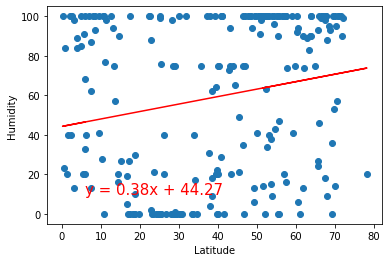

In [111]:
x_values = northern_hem['Lat']
y_values = northern_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

plt.savefig(" NH-Cloudiness vs. Latitude Linear Regression.png")


plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01844692694131972


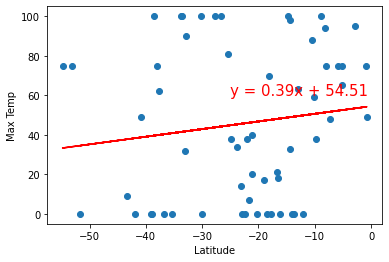

In [112]:
x_values = southern_hem['Lat']
y_values = southern_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")

plt.savefig(" SH-Cloudiness vs. Latitude Linear Regression.png")


plt.show()

The r-squared is: 0.009929085793632423


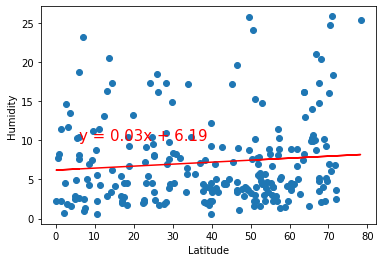

In [113]:
x_values = northern_hem['Lat']
y_values = northern_hem['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

plt.savefig(" NH-Wind_speed vs. Latitude Linear Regression.png")


plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005379825807445889


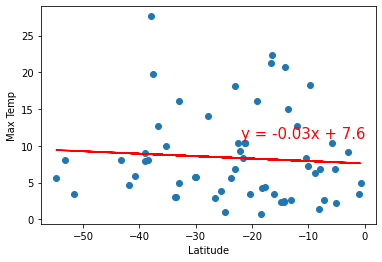

In [114]:
x_values = southern_hem['Lat']
y_values = southern_hem['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-22,11),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")

plt.savefig(" SH-Wind_speed vs. Latitude Linear Regression.png")



plt.show()